# Plotting the point repeats vs fractional error. 

Here we plot the results of the number of point repeats per frequency applied against the fractional error of the normalised fluorescence intensity. 

In [14]:
import numpy as np 
import matplotlib.pyplot as plot 
import pandas as pd 
import scipy.optimize as opt
import os 

In [15]:
def load_data(file_name):
    '''Load the data into a pandas array.'''
    
    data = pd.read_table(file_name)
    
    return(data)

In [16]:
def set_plot_params():
    # formats the plot parameters 
    plot.rcParams.update({'font.size' : 16})
    plot.rcParams.update({'figure.figsize' :[12, 8]})

In [17]:
def sqrt_fit(x, A, B, C):
    
    y = A * (1/(B*x)) + C
    
    return(y)

In [24]:
# file name and data
date = '20211216'

folder_path = 'H:\\My Documents\\Strathclyde_Back_up\\Thesis and Planning\\Thesis_plots\\' + date + '\\'
file_name = date + '_Point_repeats_statistics_measurement_for_I_4'

# Load data into a pandas array
data_file = load_data(folder_path + file_name + '.dat')

set_plot_params()

sorted_data = data_file.sort_values(by='Number of Repeats')

line_scan_number = np.array(sorted_data['Number of Repeats'])
norm_mean_counts = np.array(sorted_data['Mean Normalised Counts (n)'])
norm_mean_error = np.array(sorted_data['Standard Deviation of n'])

a = [0]

for i in range(len(line_scan_number)-1):
    if line_scan_number[i] != line_scan_number[i+1]:
        a.append(i+1) 
a.append(i+1)

mean_norm_fluor_I = []
norm_mean_error_I = []
frac_error = [] 
line = []

for i in range(len(a)-1):
    mean_norm_fluor_I.append(np.mean(norm_mean_counts[a[i]:a[i+1]]))
    norm_mean_error_I.append(np.std(norm_mean_counts[a[i]:a[i+1]]))
    
    frac_error.append(norm_mean_error_I[i]/mean_norm_fluor_I[i])
    


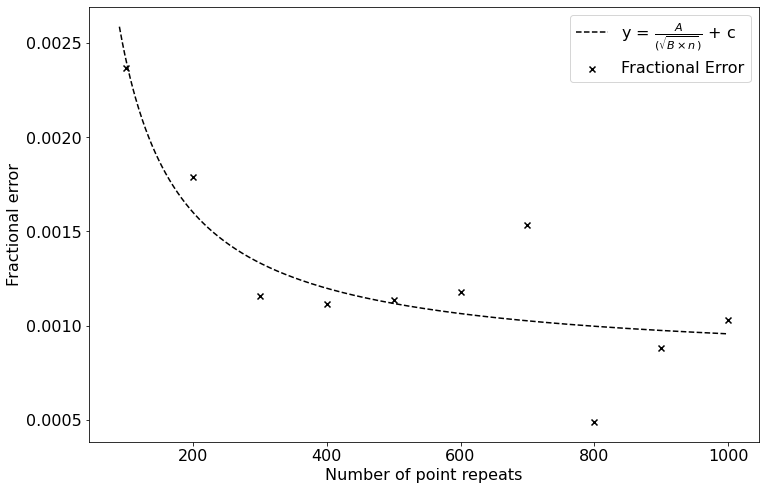

In [25]:
fig, ax = plot.subplots()

ax.scatter(line_scan_number[a[0:len(frac_error)]], frac_error, label = 'Fractional Error',
          marker = 'x', color = 'k')

p0 = [1,1,1]
fit_params, confidence = opt.curve_fit(sqrt_fit, line_scan_number[a[0:len(frac_error)]], frac_error, p0)

x = np.linspace(90, 1000, 910)

y = sqrt_fit(x, fit_params[0], fit_params[1], fit_params[2])

ax.plot(x, y, label = r'y = $\frac{A}{(\sqrt{B \times n})}$ + c', 
       linestyle = '--', color = 'k')
ax.set_xlabel('Number of point repeats')
ax.set_ylabel('Fractional error')
ax.legend()

In [7]:
print(mean_norm_fluor_I)
print(frac_error)

[0.9659346133806577, 0.9651476820394681, 0.9669022424416646, 0.9665500926592401, 0.9670830854695206]
[0.00242303075100059, 0.0012362781320371698, 0.0013169019833157893, 0.0010273007152381561, 0.0009926963919883913]
